In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
def generate_data(variance_gain_lower_limit, variance_gain_upper_limit, bias_gain_lower_limit, bias_gain_upper_limit, n_samples):
    e_b_priv = np.random.uniform(low=bias_gain_lower_limit, high=bias_gain_upper_limit, size=n_samples)
    e_b_dis = np.random.uniform(low=bias_gain_lower_limit, high=bias_gain_upper_limit, size=n_samples)
    e_v_priv = np.random.uniform(low=variance_gain_lower_limit, high=variance_gain_upper_limit, size=n_samples)
    e_v_dis = np.random.uniform(low=variance_gain_lower_limit, high=variance_gain_upper_limit, size=n_samples)

    error_diff = e_b_priv + e_b_dis + e_v_priv + e_v_dis
    fairness_diff = - e_b_priv + e_b_dis - e_v_priv + e_v_dis
    variance_diff = e_v_priv + e_v_dis
    variance_parity_diff = e_v_dis - e_v_priv 

    data = pd.DataFrame({'error_diff': error_diff, 'fairness_diff': fairness_diff, 'variance_diff': variance_diff, 
                         'variance_parity_diff': variance_parity_diff})  
    return data

In [58]:
#var_limits = [[-0.05, 0.05], [-0.08, 0.08], [-0.08, 0.08]]
#bias_limits = [[-0.05, 0.05], [-0.02, 0.02], [0.08, 0.08]]

var_limits = [[-0.05, 0.05], [-0.08, 0.08], [-0.02, 0.02]]
bias_limits = [[-0.05, 0.05], [-0.02, 0.02], [-0.08, 0.08]]

#var_limits = [[-0.15, 0.15], [-0.15, 0.15], [-0.03, 0.03]]
#bias_limits = [[-0.15, 0.15], [-0.03, 0.03], [-0.15, 0.15]]

# n_samples = 2500
n_samples = 5_000
all_data = {}

In [59]:
for i in range(len(var_limits)):
    all_data[i] = generate_data(var_limits[i][0], var_limits[i][1], bias_limits[i][0], bias_limits[i][1], n_samples)

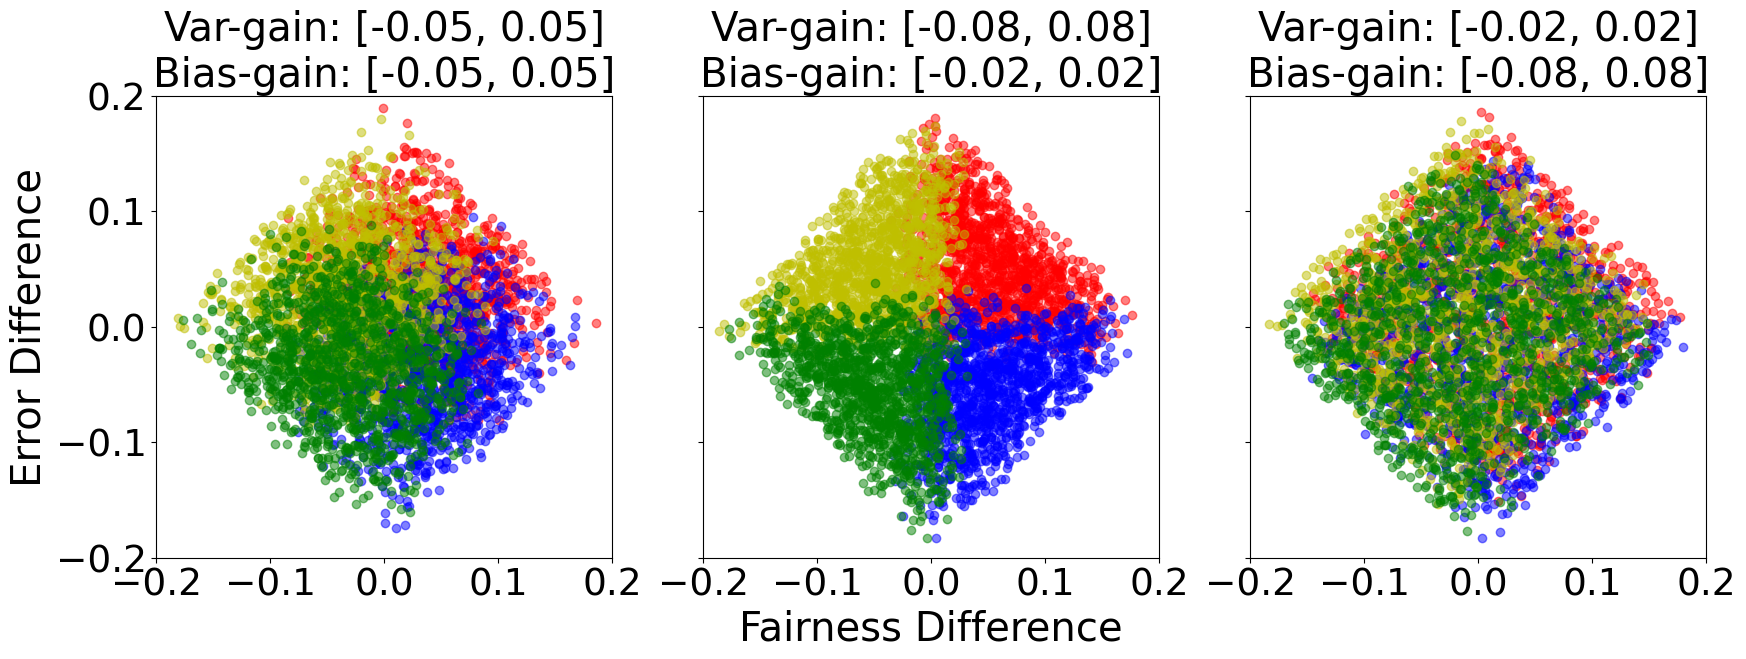

In [60]:
fig, ax = plt.subplots(1, len(var_limits), figsize=(20, 6), sharex=True, sharey=True)

for plot_idx in range(len(var_limits)):
    data = all_data[plot_idx]

    less_stable_less_groupwise_stable = data[(data.variance_diff>0) & (data.variance_parity_diff>0)]
    more_stable_less_groupwise_stable = data[(data.variance_diff<0) & (data.variance_parity_diff>0)]
    less_stable_more_groupwise_stable = data[(data.variance_diff>0) & (data.variance_parity_diff<0)]
    more_stable_more_groupwise_stable = data[(data.variance_diff<0) & (data.variance_parity_diff<0)]

    ax[plot_idx].plot(less_stable_less_groupwise_stable.fairness_diff, less_stable_less_groupwise_stable.error_diff, 'o', alpha=0.5, c='r', label='more unstable, more disparity in stability')
    ax[plot_idx].plot(more_stable_less_groupwise_stable.fairness_diff, more_stable_less_groupwise_stable.error_diff, 'o', alpha=0.5,c ='b', label='more stable, more disparity in stability')
    ax[plot_idx].plot(less_stable_more_groupwise_stable.fairness_diff, less_stable_more_groupwise_stable.error_diff, 'o', alpha=0.5, c='y', label='more unstable, less disparity in stability')
    ax[plot_idx].plot(more_stable_more_groupwise_stable.fairness_diff, more_stable_more_groupwise_stable.error_diff, 'o', alpha=0.5,c ='g', label='more stable, less disparity in stability')

    ax[plot_idx].set_title("Var-gain: " + str(var_limits[plot_idx]) + "\nBias-gain: " + str(bias_limits[plot_idx]), fontsize=29)

    ax[plot_idx].set_xlim(-0.2, 0.2)
    ax[plot_idx].set_ylim(-0.2, 0.2)
    ax[plot_idx].tick_params(labelsize=27)

ax[1].set_xlabel('Fairness Difference', fontsize=29)
ax[0].set_ylabel('Error Difference', fontsize=29)
# plt.legend(ncols=2, loc = (-2.4, 0.01), fontsize=20)
plt.show()

Stability and accuracy go hand in hand, ie. if outcomes are more arbitrary, they will be less accurate. 

Middle plot:
>blue: worse on fairness, better on accuracy, better on overall stability, worse on disparity in stability
>red: worse on fairness, worse on accuracy, worse on overall stability, worse on disparity in stability
>yellow: better on fairness, worse on accuracy, worse on overall stability, better on disparity in stability ----> fairness is meaningless if outcomes are arbitrary
>green: better on fairness, better on accuracy, better on overall stability, better on disparity in stability (BEST)

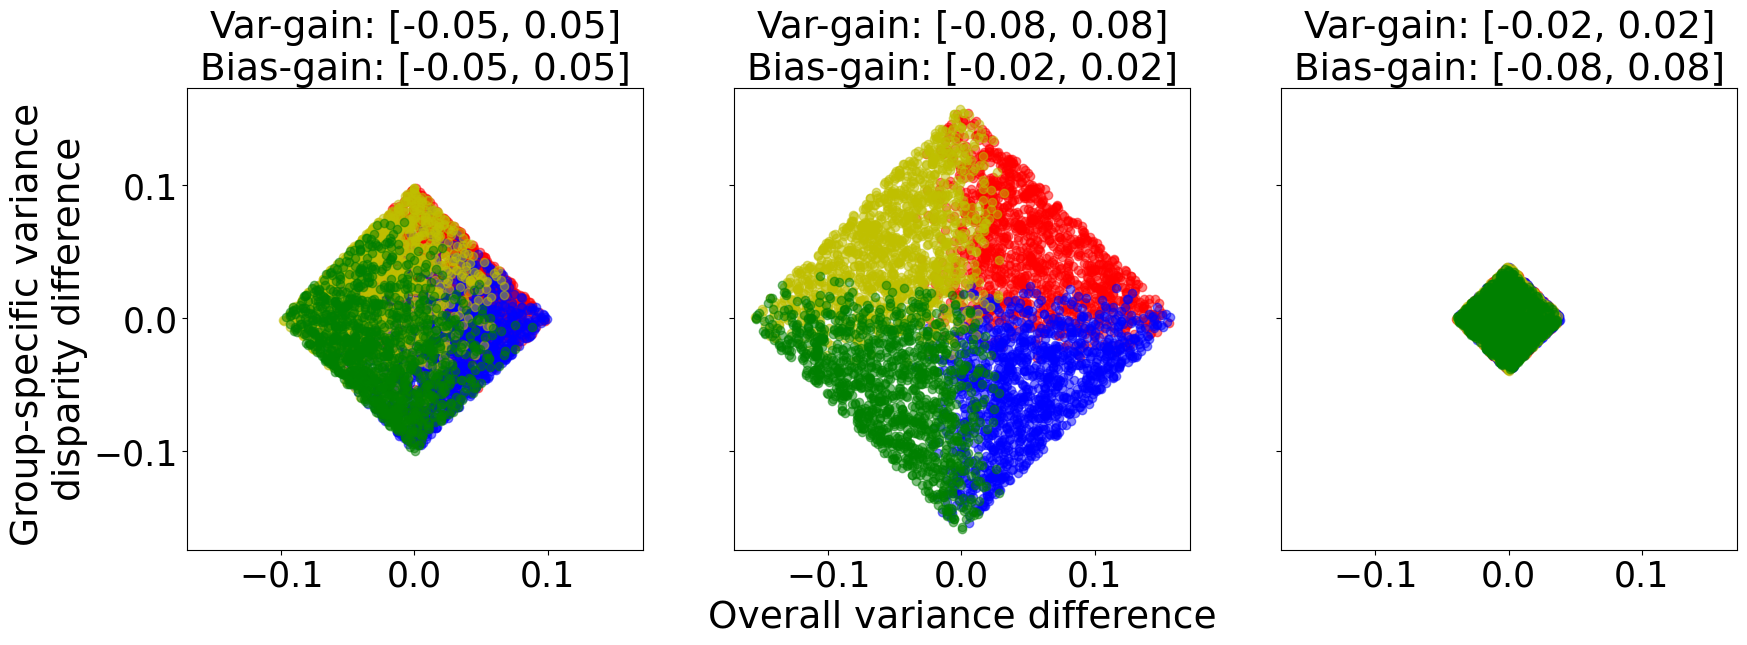

In [65]:
base_font_size = 25
fig, ax = plt.subplots(1, len(var_limits), figsize=(20, 6), sharex=True, sharey=True)

for plot_idx in range(len(var_limits)):
    data = all_data[plot_idx]

    less_fair_less_accurate = data[(data.fairness_diff>0) & (data.error_diff>0)]
    more_fair_less_accurate = data[(data.fairness_diff<0) & (data.error_diff>0)]
    less_fair_more_accurate = data[(data.fairness_diff>0) & (data.error_diff<0)]
    more_fair_more_accurate = data[(data.fairness_diff<0) & (data.error_diff<0)]

    ax[plot_idx].plot(less_fair_less_accurate.variance_diff, less_fair_less_accurate.variance_parity_diff, 'o', alpha=0.5, c='r', label='less fair, less accurate')
    ax[plot_idx].plot(more_fair_less_accurate.variance_diff, more_fair_less_accurate.variance_parity_diff, 'o', alpha=0.5,c ='b', label='more fair, less accurate')
    ax[plot_idx].plot(less_fair_more_accurate.variance_diff, less_fair_more_accurate.variance_parity_diff, 'o', alpha=0.5, c='y', label='less fair, more accurate')
    ax[plot_idx].plot(more_fair_more_accurate.variance_diff, more_fair_more_accurate.variance_parity_diff, 'o', alpha=0.5,c ='g', label='more fair, more accurate')

    ax[plot_idx].set_title("Var-gain: " + str(var_limits[plot_idx]) + "\nBias-gain: " + str(bias_limits[plot_idx]), fontsize=base_font_size + 2)
    ax[plot_idx].tick_params(labelsize=base_font_size)

    #ax[plot_idx].set_xlim(-0.45, 0.45)
    #ax[plot_idx].set_ylim(-0.45, 0.45)

ax[1].set_xlabel('Overall variance difference', fontsize=base_font_size + 2)
ax[0].set_ylabel('Group-specific variance \ndisparity difference', fontsize=base_font_size + 2)
# plt.legend(ncols=2, loc = 'upper right', fontsize=14)
plt.show()

Middle plot:
> yellow: less fair, more stable overall, but more disparity in stability, more accurate. 

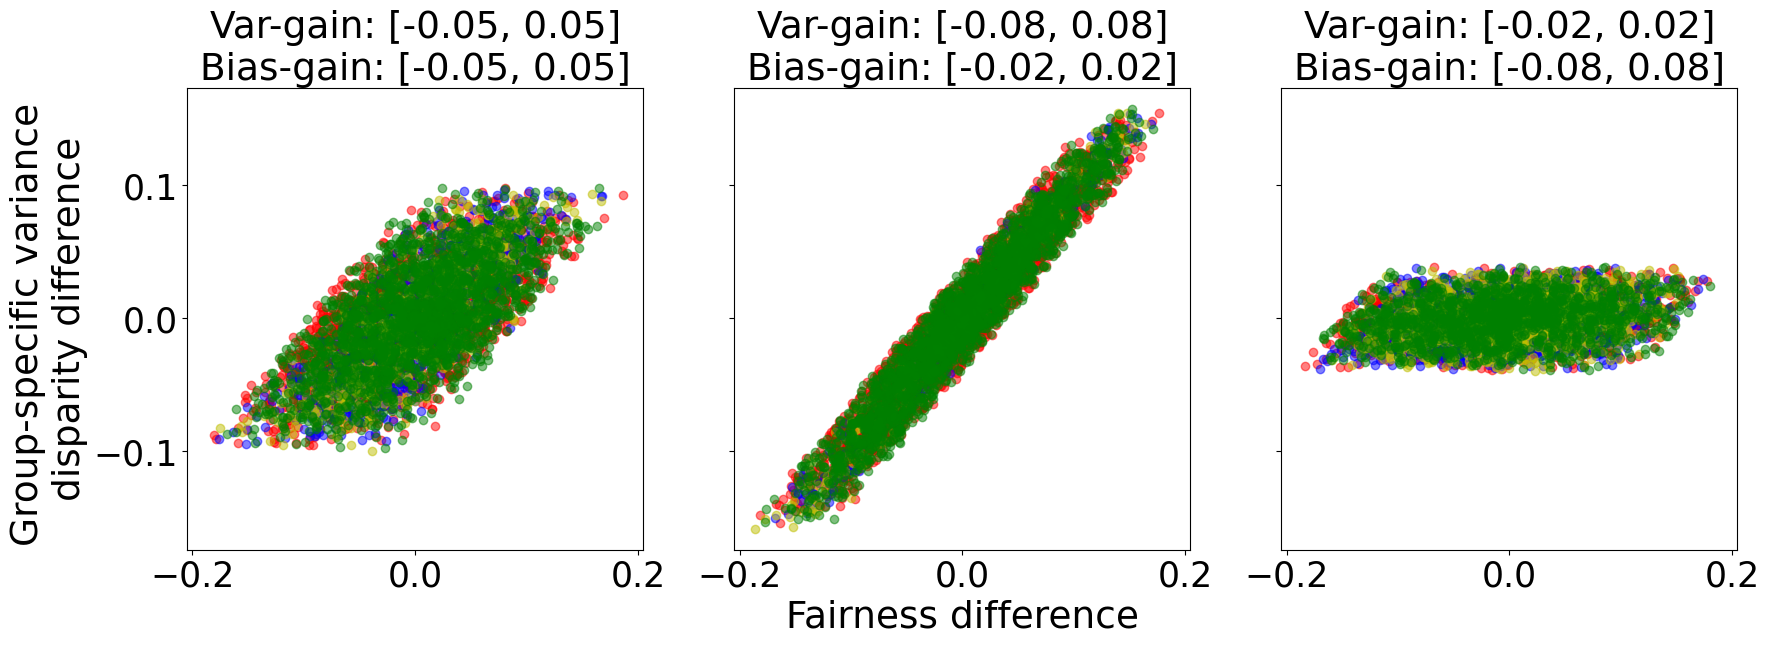

In [66]:
base_font_size = 25
fig, ax = plt.subplots(1, len(var_limits), figsize=(20, 6), sharex=True, sharey=True)

for plot_idx in range(len(var_limits)):
    data = all_data[plot_idx]

    less_stable_less_accurate = data[(data.variance_diff>0) & (data.error_diff>0)]
    more_stable_less_accurate = data[(data.variance_diff<0) & (data.error_diff>0)]
    less_stable_more_accurate = data[(data.variance_diff>0) & (data.error_diff<0)]
    more_stable_more_accurate = data[(data.variance_diff<0) & (data.error_diff<0)]

    ax[plot_idx].plot(less_stable_less_accurate.fairness_diff, less_stable_less_accurate.variance_parity_diff, 'o', alpha=0.5, c='r', label='less stable, less accurate')
    ax[plot_idx].plot(more_stable_less_accurate.fairness_diff, more_stable_less_accurate.variance_parity_diff, 'o', alpha=0.5,c ='b', label='more stable, less accurate')
    ax[plot_idx].plot(less_stable_more_accurate.fairness_diff, less_stable_more_accurate.variance_parity_diff, 'o', alpha=0.5, c='y', label='less stable, more accurate')
    ax[plot_idx].plot(more_stable_more_accurate.fairness_diff, more_stable_more_accurate.variance_parity_diff, 'o', alpha=0.5,c ='g', label='more stable, more accurate')

    ax[plot_idx].set_title("Var-gain: " + str(var_limits[plot_idx]) + "\nBias-gain: " + str(bias_limits[plot_idx]), fontsize=base_font_size + 2)
    ax[plot_idx].tick_params(labelsize=base_font_size)

    #ax[plot_idx].set_xlim(-0.3, 0.3)
    #ax[plot_idx].set_ylim(-0.3, 0.3)

ax[1].set_xlabel('Fairness difference', fontsize=base_font_size + 2)
ax[0].set_ylabel('Group-specific variance \ndisparity difference', fontsize=base_font_size + 2)
#plt.legend(ncols=2, loc = (-1, 0.845), fontsize=14)
# plt.legend(ncols=1, loc = "upper right", fontsize=14)
plt.show()

Different fairness interventions act upon the model error differently, ie. they reduce disparity in error by redistributing the error across groups, and across bias and variance differently. The broader take-away of this study is to use this trade-off/taxonomy of fairness-stability behavior to pick a suitable intervention for the context of use. If it's a social domain, where recourse is important, you might want to pick a fairness intervention that redistributes error in a way that decreases disparity in variance across groups --- the other notions of parity are less relevant here. [point to the figure that shows this behavior (sub fig 2 above)]

Metrics are good. They help us measure things precisely, and metrics that can be measured reasonably accurately are even better --- because they help us pick the best thing that fits our desires! But, the secret ingredient here is an understanding of the metrics. That metrics are well motivated, well studied, and they applicability and suitability is well understood. All metrics are not useful everywhere. You should be thoughtful about which metrics to use where. In this paper we introduce new metrics, but also theoretically analyse what these metrics tell us about model performance that we did not know before, as well as in which cases/ for which applications which metrics are most suitable (specially for model selection), and why. 

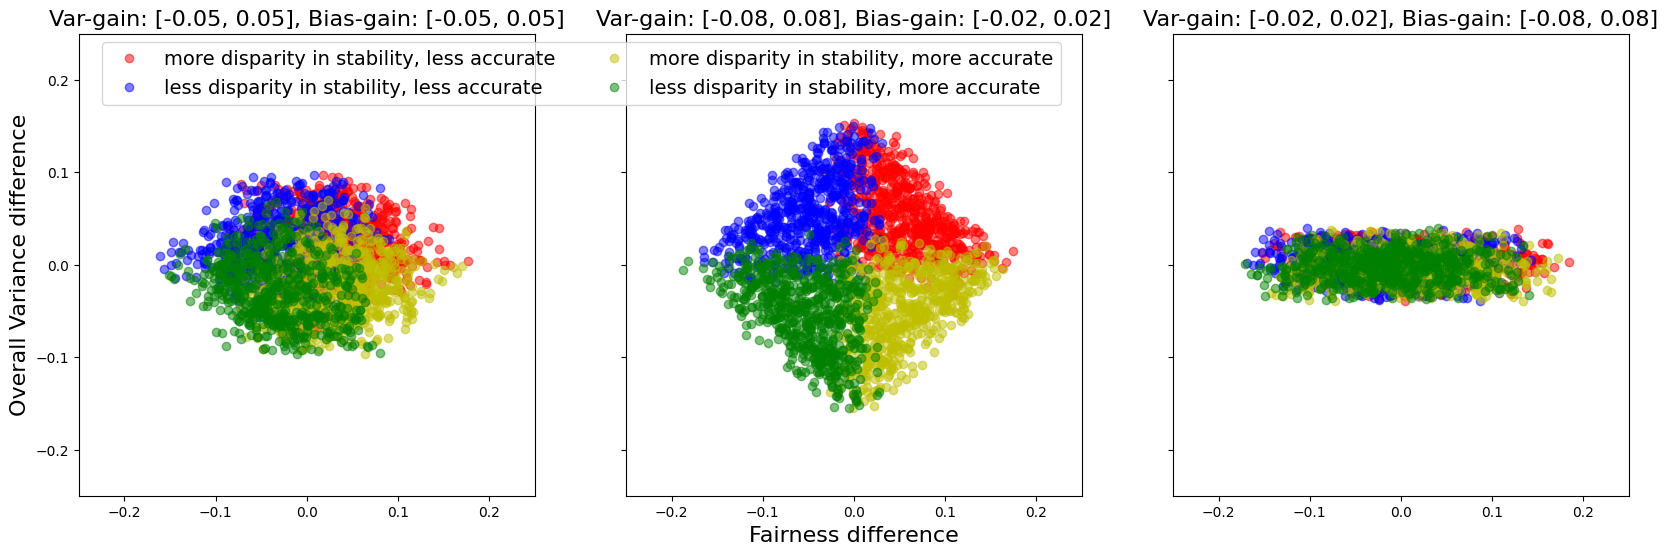

In [8]:
fig, ax = plt.subplots(1, len(var_limits), figsize=(20, 6), sharex=True, sharey=True)

for plot_idx in range(len(var_limits)):
    data = all_data[plot_idx]

    more_var_disparity_less_accurate = data[(data.variance_parity_diff>0) & (data.error_diff>0)]
    less_var_disparity_less_accurate = data[(data.variance_parity_diff<0) & (data.error_diff>0)]
    more_var_disparity_more_accurate = data[(data.variance_parity_diff>0) & (data.error_diff<0)]
    less_var_disparity_more_accurate = data[(data.variance_parity_diff<0) & (data.error_diff<0)]

    ax[plot_idx].plot(more_var_disparity_less_accurate.fairness_diff, more_var_disparity_less_accurate.variance_diff, 'o', alpha=0.5, c='r', label='more disparity in stability, less accurate')
    ax[plot_idx].plot(less_var_disparity_less_accurate.fairness_diff, less_var_disparity_less_accurate.variance_diff, 'o', alpha=0.5,c ='b', label='less disparity in stability, less accurate')
    ax[plot_idx].plot(more_var_disparity_more_accurate.fairness_diff, more_var_disparity_more_accurate.variance_diff, 'o', alpha=0.5, c='y', label='more disparity in stability, more accurate')
    ax[plot_idx].plot(less_var_disparity_more_accurate.fairness_diff, less_var_disparity_more_accurate.variance_diff, 'o', alpha=0.5,c ='g', label='less disparity in stability, more accurate')

    ax[plot_idx].set_title("Var-gain: " + str(var_limits[plot_idx]) + ", Bias-gain: " + str(bias_limits[plot_idx]), fontsize=16)

    ax[plot_idx].set_xlim(-0.25, 0.25)
    ax[plot_idx].set_ylim(-0.25, 0.25)

ax[1].set_xlabel('Fairness difference', fontsize=16)
ax[0].set_ylabel('Overall Variance difference', fontsize=16)
plt.legend(ncols=2, loc = (-2.35, 0.845), fontsize=14)
plt.show()

Middle plot: If you redistribute error mostly through variance, you get parity in variance for free with parity in error (Fairness). 
If you distribute error through bias, then you can't improve variance disparity. 